In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.cluster import KMeans

In [62]:
img = cv2.imread("./Dataset/K-Means project/image1.jpg")

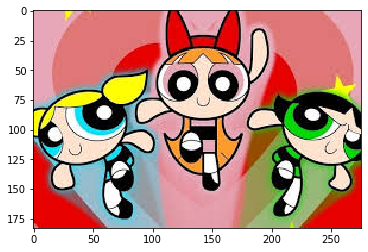

(183, 276, 3)

In [63]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img.shape

In [64]:
X = img.reshape((-1,3))
print(X.shape)

(50508, 3)


In [94]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [95]:
centers = kmeans.cluster_centers_

In [96]:
print(centers)

[[210.62891512 171.55810259 156.43511689]
 [ 98.0397772   29.28079948  15.40176933]]


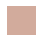

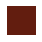

In [97]:
colors = []
for i,color in enumerate(centers):
    plt.subplot(1,10,i+1)
    colors.append(color)
    square = np.zeros((100,100,3),dtype='uint8')
    square[:,:,:] = color
    plt.imshow(square)
    plt.axis("off")
    plt.show()

In [98]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1]), array([35247, 15261], dtype=int64))

In [99]:
labels = kmeans.labels_

In [100]:
new_img  = np.zeros(X.shape)
for ix in range(X.shape[0]):
    new_img[ix] = colors[labels[ix]]

print(new_img.shape)

(50508, 3)


In [101]:
new_img = new_img.reshape(img.shape)

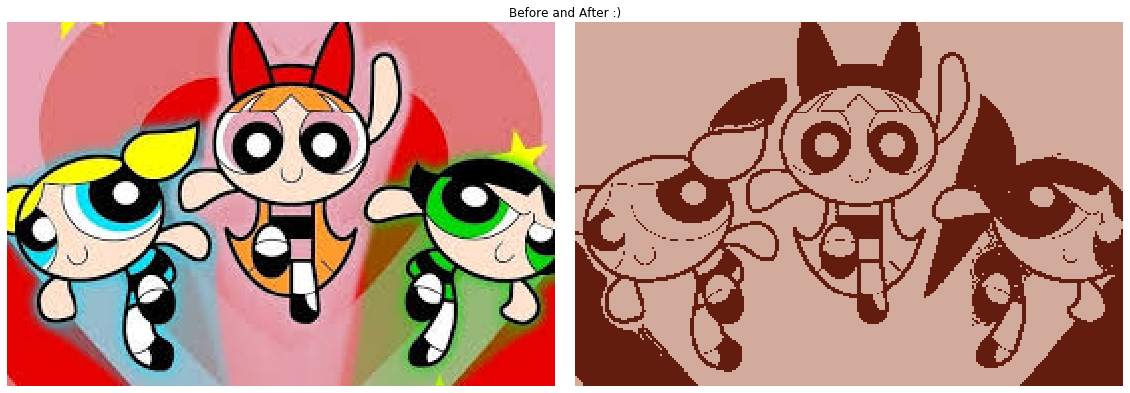

In [102]:
new_img = new_img/255
plt.figure(figsize=((20,20)))
plt.imshow(np.hstack((img/255,np.ones((183, 10, 3)),new_img)))
plt.axis("off")
plt.title("Before and After :)")
plt.show()